In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold



In [16]:
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]


### 1. Load the Wine Dataset 
- How Many Records Are Available?
- Check if there are any NaN values in X
- How Many Elements Does Each Class Contain?

In [17]:
print("Number of records (rows):", X.shape[0])
print("Number of features (columns):", X.shape[1], '\n')

has_missing = np.isnan(X).any()
print("Are there any missing values in the dataset?", has_missing, '\n')


unique_classes, counts = np.unique(y, return_counts=True)
for class_label, count in zip(unique_classes, counts):
    print(f"Class {class_label} -> {count} records")



Number of records (rows): 178
Number of features (columns): 13 

Are there any missing values in the dataset? False 

Class 0 -> 59 records
Class 1 -> 71 records
Class 2 -> 48 records


### 2. Create and Train a Default Decision Tree

In [18]:
clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier()

### 3. Visualizing the Decision Tree

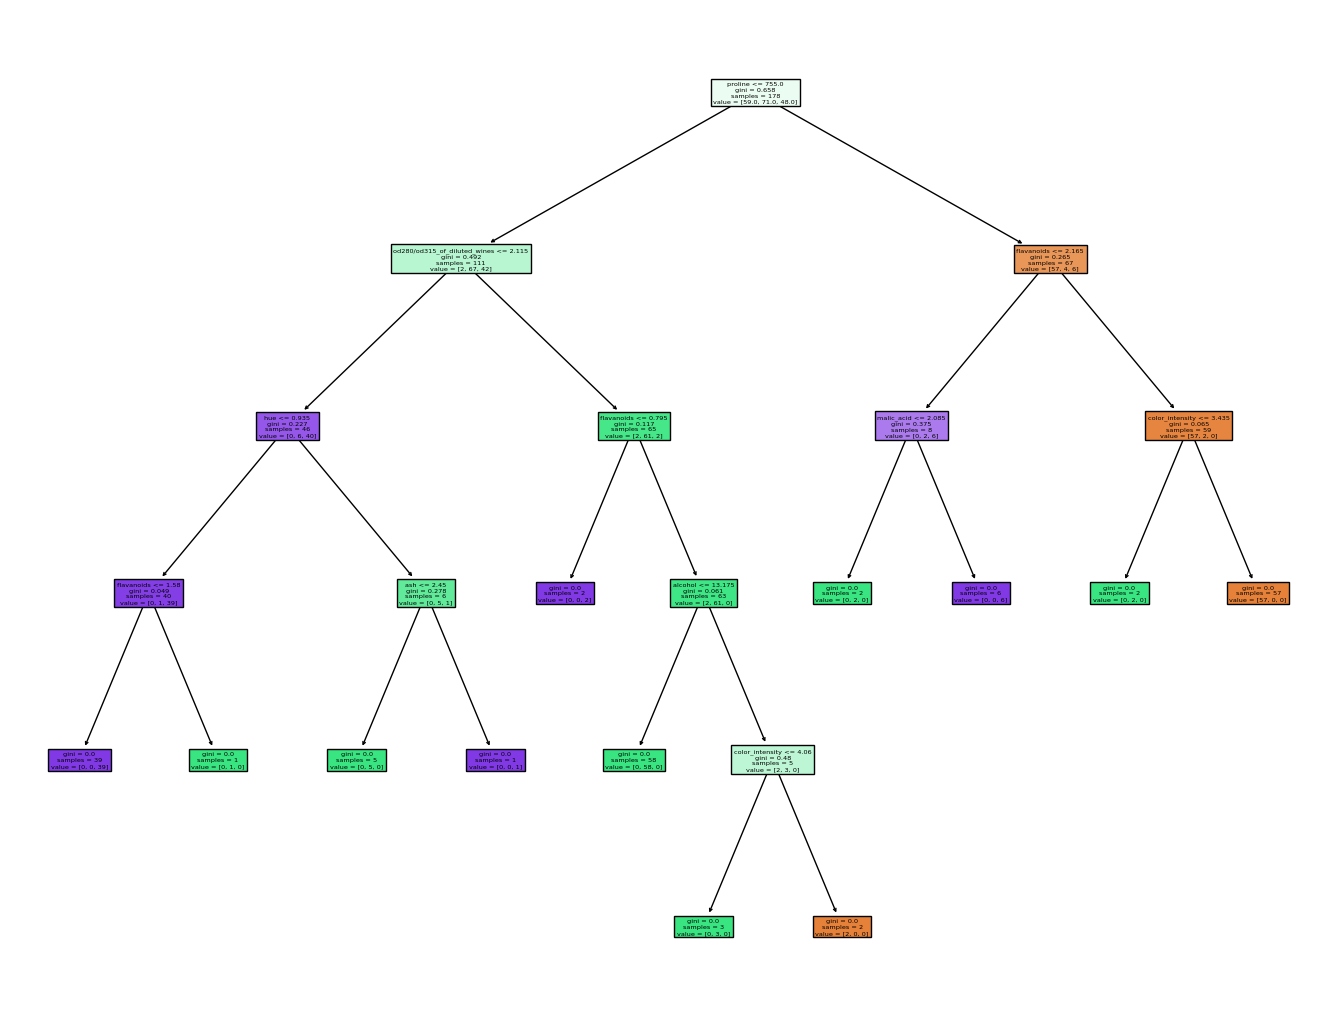

In [19]:
plt.figure(figsize=(17, 13))  # Adjust figure size as needed
plot_tree(clf, feature_names=feature_names, filled=True)
plt.savefig("decision_tree.pdf")

### 4. Making Predictions and Measuring Accuracy

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


### 5. Evaluate on the Test Set

In [21]:
precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')
f1        = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:   ", recall)
print("F1 Score: ", f1, "\n")



Precision: 0.9583333333333334
Recall:    0.9345238095238096
F1 Score:  0.94320987654321 



In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### 6.1. Identify Hyperparameters & Their Possible Values

In [23]:
param_grid = {
    "criterion":        ["gini", "entropy"],     # Splitting measure
    "max_depth":        [None, 2, 4, 6, 8],      # Depth of tree
    "min_samples_split": [2, 5, 10],            # Min # samples required to split
    "min_samples_leaf":  [1, 2, 4, 6],          # Min # samples per leaf
    "splitter":          ["best", "random"]     # Strategy to choose the split
}


grid = ParameterGrid(param_grid)

for config in grid:
    print(config)


{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
{'criterion': 'gin

### 6.2. Training and Testing for Each Combination

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

best_accuracy = 0.0
best_config = None

for config in grid:
    
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)

    y_pred_test = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)

    
    if acc > best_accuracy:
        best_accuracy = acc
        best_config = config

print("Best accuracy on test set:", best_accuracy)
print("Best hyperparameter configuration:", best_config)

Best accuracy on test set: 1.0
Best hyperparameter configuration: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


since the dataset is relativly slmaller the model will overfitted. To confront it we have to take another approach.

### 7.1 Implementing k-Fold Cross-Validation

In [25]:

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:

param_grid = {
    "criterion":        ["gini", "entropy"],     # Splitting measure
    "max_depth":        [None, 2, 4, 6, 8],      # Depth of tree
    "min_samples_split": [2, 5, 10],            # Min # samples required to split
    "min_samples_leaf":  [1, 2, 4, 6],          # Min # samples per leaf
    "splitter":          ["best", "random"]     # Strategy to choose the split
}

best_config = None
best_cv_accuracy = 0.0

for config in ParameterGrid(param_grid):
    fold_accuracies = []
    
    # For each hyperparam set, do k-fold CV
    for train_index, val_index in kf.split(X_train_valid):
        # Split X_train_valid into this fold's train/val
        X_cv_train = X_train_valid[train_index]
        y_cv_train = y_train_valid[train_index]
        X_cv_val   = X_train_valid[val_index]
        y_cv_val   = y_train_valid[val_index]
        
        # Train the model
        clf = DecisionTreeClassifier(**config)
        clf.fit(X_cv_train, y_cv_train)
        
        # Evaluate on validation fold
        y_cv_pred = clf.predict(X_cv_val)
        acc = accuracy_score(y_cv_val, y_cv_pred)
        
        # Store fold accuracy
        fold_accuracies.append(acc)
    
    # Average performance across folds
    mean_accuracy = np.mean(fold_accuracies)
    
    # Check if this is the best so far
    if mean_accuracy > best_cv_accuracy:
        best_cv_accuracy = mean_accuracy
        best_config = config

print("Best config found by CV:", best_config)
print("CV Accuracy for that config:", best_cv_accuracy)


Best config found by CV: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
CV Accuracy for that config: 0.9509852216748769


In [13]:
best_clf = DecisionTreeClassifier(**best_config)
best_clf.fit(X_train_valid, y_train_valid)


y_test_pred = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Final Test Accuracy:", test_acc)


Final Test Accuracy: 0.9444444444444444


### 8.1. Compute Feature Importances Using Scikit-Learn

In [27]:
importances = clf.feature_importances_

# Display feature importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

alcohol: 0.0000
malic_acid: 0.0000
ash: 0.0000
alcalinity_of_ash: 0.0136
magnesium: 0.1168
total_phenols: 0.0000
flavanoids: 0.0000
nonflavanoid_phenols: 0.0000
proanthocyanins: 0.0000
color_intensity: 0.3545
hue: 0.0152
od280/od315_of_diluted_wines: 0.4798
proline: 0.0201


### 8.2. Visualizing Feature Importances

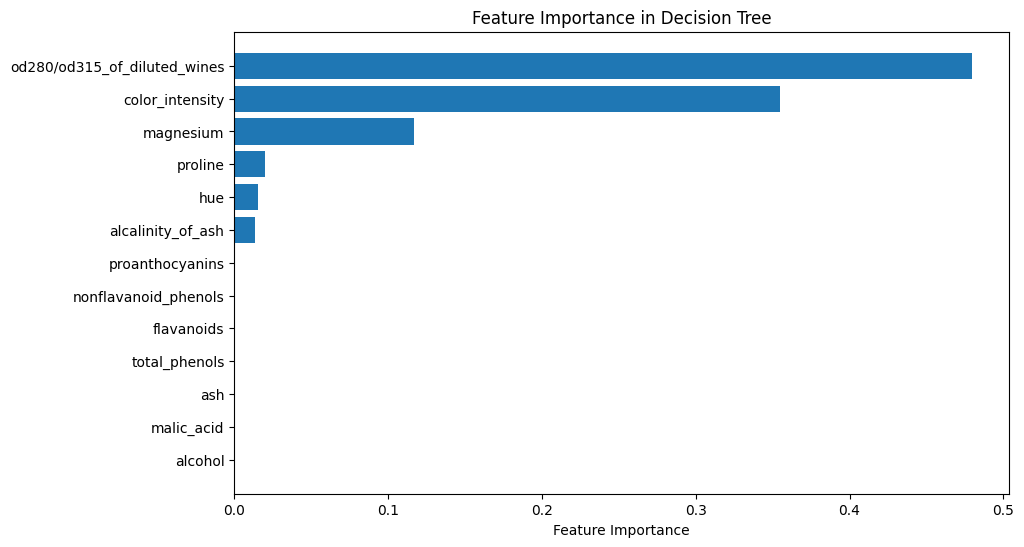

In [28]:


# Sort features by importance
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()
